## Numerical Simulation Laboratory (NSL)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

### Exercise 2

One of the aims of lesson 8 is to write a code to solve an analytically unsolvable problem: I had to variationally optimize the ground state of a single quantum particle in a one dimensional space confined by the potential:

$$
V(x) = x^4 - \frac{5}{2}x^2
$$

In particular I wrote a Variational Monte Carlo code to sample the trial wave function (approximate model for the ground state wave function):

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

The goal is to find the wave function parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$:

$$
\langle {\hat H} \rangle_T = \frac{\langle \Psi_T^{\sigma,\mu}| {\hat H} | \Psi_T^{\sigma,\mu} \rangle}
{\langle \Psi_T^{\sigma,\mu} | \Psi_T^{\sigma,\mu} \rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

<H> minimied for mu = 0.79 , sigma = 0.64


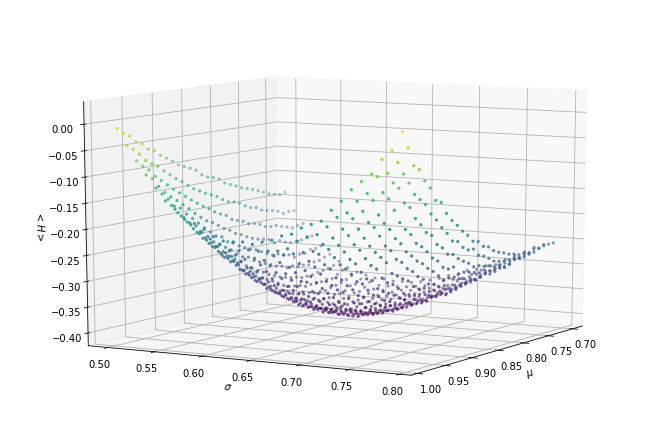

In [2]:
mu, sigma, H = np.loadtxt("Exercise_02/variational.dat", usecols=(0,1,2), unpack = True)

fig = plt.figure(figsize = (9, 6))
ax = Axes3D(fig)
ax.scatter(mu, sigma, H, c=H, marker='.')
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('$<H>$')
ax.view_init(10, 30)

print("<H> minimied for mu =", mu[np.argsort(H)[0]], ", sigma =", sigma[np.argsort(H)[0]])

I found that optimal parameters for the wave function are $\mu=0.79$ and $\sigma=0.64$.

I than produced a picture of the estimation of $\langle {\hat H} \rangle_T$ and its statistical uncertainty as a function of the number of blocks.

I also plotted the histogram with the sampled configurations to obtain the sampled wave function $|\Psi_T(x)|^2$, and compared it with the analytic curve and the numerical solution provided.

Results are shown below.

In [3]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2
    
def PDF(x, mu, sigma):
    wf=np.exp(-(x-mu)**2/(2.*sigma**2))+np.exp(-(x+mu)**2/(2.*sigma**2))
    return wf*wf

hbar = 1
m = 1
a = 6
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])

Ground state energy:  -0.4604584507991175


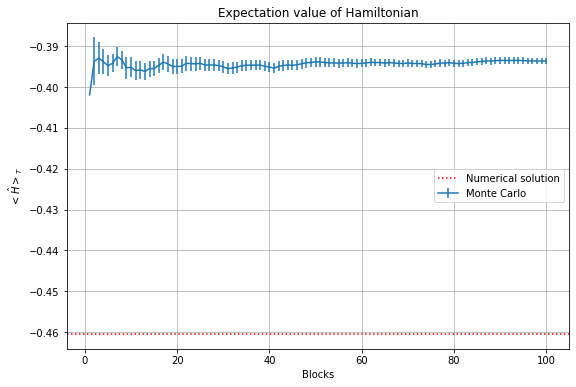

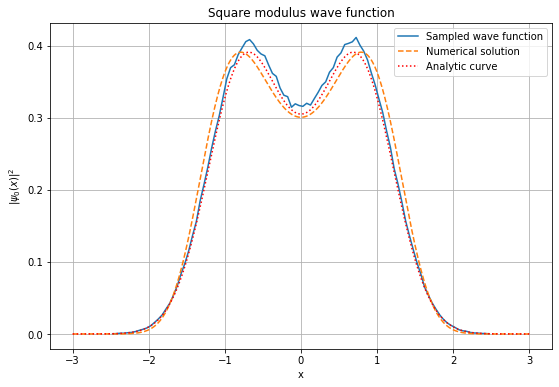

In [4]:
plt.figure(1, figsize = (9, 6))

x_H, y_H, yerr_H = np.loadtxt("Exercise_02/hamiltonian.dat", unpack = True)
plt.title("Expectation value of Hamiltonian")
plt.xlabel('Blocks')
plt.ylabel('$< \hat H >_T$')
plt.axhline(y=-0.46046587969271563, color='r', linestyle="dotted", label = "Numerical solution")
plt.errorbar(x_H, y_H, yerr_H, label = "Monte Carlo")
plt.grid(True)
plt.legend()

plt.figure(2, figsize = (9, 6))

data_x,data_y = np.loadtxt("Exercise_02/sampled_position_histogram.dat", unpack = True)

scale = 0.35
plt.plot(data_x, data_y, label="Sampled wave function")
plt.plot(x,(psi[0])**2, label="Numerical solution", linestyle='dashed')
plt.plot(x, scale*PDF(x, 0.79, 0.64), label="Analytic curve", color='r', linestyle="dotted")
plt.title("Square modulus wave function")
plt.xlabel("x")
plt.ylabel(r"$|\psi_0(x)|^2$")
plt.grid(True)
plt.legend()

### Exercise 3

I than used the provided PIMC/PIGS code to study the same 1D quantum system described above.
I reported the results obtained using PIGS algorithm ($T=0$) in two different scenarios, starting from two different trial wave functions:

- $\Psi_T(x)=1$ (constant trial wave function)
- $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ (with variational parameters $\mu$ and $\sigma$ that I found in previous exercise)

Parameters used for the simulation are those reported in file **input.pigs**, except for the parameter *imaginaryTimePropagation* (specified below).

Below I reported the graphs of such results compared with those obtained with my Monte Carlo code and with the numerical solution.

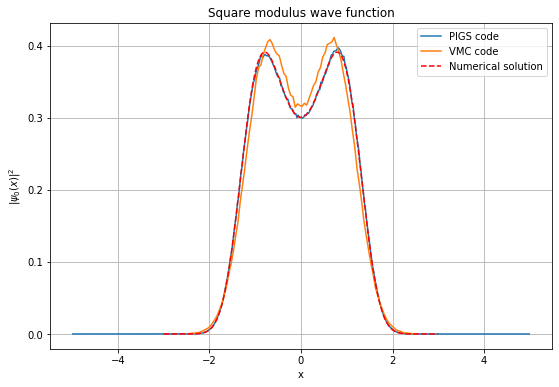

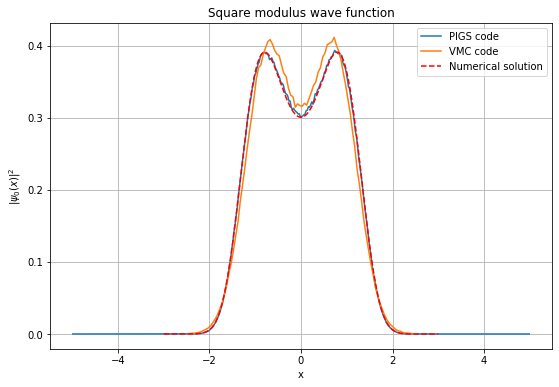

In [5]:
plt.figure(1, figsize = (9, 6))

x_pigs_const, y_pigs_const, yerr_pigs_const = np.loadtxt("QMC_1D/Exercise_03/PIGS_const/probability.dat", unpack = True)

plt.plot(x_pigs_const, y_pigs_const, label="PIGS code")

plt.plot(data_x, data_y, label="VMC code")
plt.plot(x,(psi[0])**2, label="Numerical solution", linestyle='dashed', color='r')
plt.title("Square modulus wave function")
plt.xlabel("x")
plt.ylabel(r"$|\psi_0(x)|^2$")
plt.grid(True)
plt.legend()

plt.figure(2, figsize = (9, 6))

x_pigs_tr, y_pigs_tr, yerr_pigs_tr = np.loadtxt("QMC_1D/Exercise_03/PIGS_trial/probability.dat", unpack = True)

plt.plot(x_pigs_tr, y_pigs_tr, label="PIGS code")
plt.plot(data_x, data_y, label="VMC code")
plt.plot(x,(psi[0])**2, label="Numerical solution", linestyle='dashed', color='r')
plt.title("Square modulus wave function")
plt.xlabel("x")
plt.ylabel(r"$|\psi_0(x)|^2$")
plt.grid(True)
plt.legend()

It is evident that results obtained with PIGS code are much closer to numerical solution than those obtained with my variational Monte Carlo.

Results for trial wavefunction $\Psi_T(x)=1$ are obtained by setting *imaginaryTimePropagation*=$4.0$.
Choosing a lower value leads to poorer results: the sampled wave function starts to detach visibly from numerical solution.
By using $\Psi_T^{\sigma,\mu}(x)$ I can reduce the imaginary time propagation till around $2.0$ before observing such poor results.

Finally, I ran the PIMC algorithm ($T>0$) to observe how the sampled wave function changes varying the temperature.

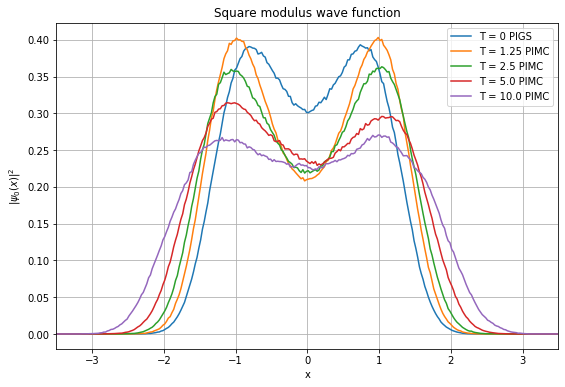

In [6]:
plt.figure(figsize = (9, 6))

x_pimc_1_25, y_pimc_1_25, yerr_pimc_1_25 = np.loadtxt("QMC_1D/Exercise_03/PIMC/probability_1_25.dat", unpack = True)
x_pimc_2_50, y_pimc_2_50, yerr_pimc_2_50 = np.loadtxt("QMC_1D/Exercise_03/PIMC/probability_2_5.dat", unpack = True)
x_pimc_5_00, y_pimc_5_00, yerr_pimc_5_00 = np.loadtxt("QMC_1D/Exercise_03/PIMC/probability_5.dat", unpack = True)
x_pimc_10_0, y_pimc_10_0, yerr_pimc_10_0 = np.loadtxt("QMC_1D/Exercise_03/PIMC/probability_10.dat", unpack = True)

plt.plot(x_pigs_tr, y_pigs_tr, label="T = 0 PIGS")
plt.plot(x_pimc_1_25, y_pimc_1_25, label="T = 1.25 PIMC")
plt.plot(x_pimc_2_50, y_pimc_2_50, label="T = 2.5 PIMC")
plt.plot(x_pimc_5_00, y_pimc_5_00, label="T = 5.0 PIMC")
plt.plot(x_pimc_10_0, y_pimc_10_0, label="T = 10.0 PIMC")
plt.xlim((-3.5, 3.5))
plt.title("Square modulus wave function")
plt.xlabel("x")
plt.ylabel(r"$|\psi_0(x)|^2$")
plt.grid(True)
plt.legend()